In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


In [2]:
#loading data
data = pd.read_csv("/Users/vickichen/Desktop/RnR/marketing_campaign.csv",sep ="\t")


In [3]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
print(data[data['Income'].isnull()])

         ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Gra

In [6]:
data = data.dropna()

In [7]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
#convert Dt_customer from string to datatime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data.info()
dates =[]
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("Date of registration of the company's newest client:", max(dates))
print("Date of registration of the company's old client:", min(dates))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [9]:
# total categories in martial_status
print(data['Marital_Status'].value_counts(), "\n")

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 



In [10]:
#total categories in Education
print(data['Education'].value_counts(),"\n")

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64 



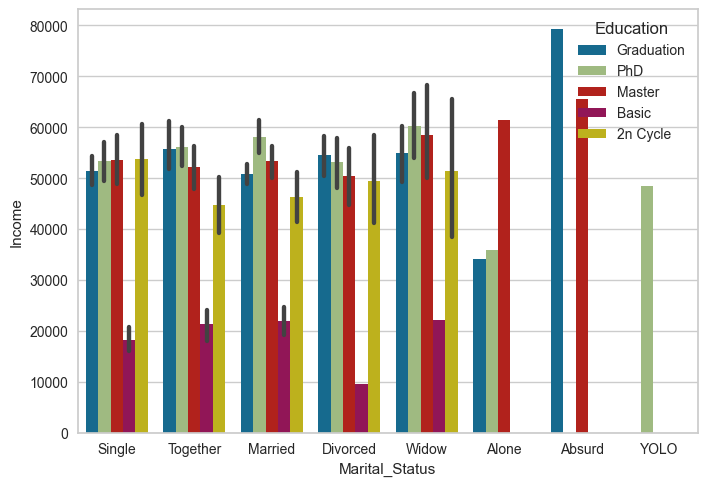

In [11]:
sns.barplot(data=data, x="Marital_Status",y="Income",hue="Education")
plt.show()

## Feature Engineering 

In [12]:
#Create "Customer_From_days"
days =[]
d1 = max(dates) # taking it to be the newest customer
for i in dates:
    delta = d1-i
    days.append(delta)
data["Customer_From_days"] = days
data ["Customer_From_days"]= pd.to_numeric(data["Customer_From_days"], errors = 'coerce')


In [13]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_From_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,83894400000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,10800000000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,40780800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,5616000000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,27734400000000000


In [14]:
# convert value in "Customer_From_days" column from nanoseconds to days 
for i in range(len(data['Customer_From_days'])):
    try:
        t=0
        t=data['Customer_From_days'][i]
        data['Customer_From_days'][i]=t/60/60/24/1000000000
    except KeyError:
        pass

In [15]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_From_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,971
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,125
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,472
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,65
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,321


In [16]:
#Create the age of the customers
data["Age"] = 2022 -data["Year_Birth"]

In [17]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [18]:
#put alone, absurd,yolo to single
data['Marital_Status'].replace('Alone','Single',inplace=True)
data['Marital_Status'].replace('Absurd','Single', inplace=True)
data['Marital_Status'].replace('YOLO','Single',inplace=True)

In [19]:
data['Marital_Status'].value_counts()

Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: Marital_Status, dtype: int64

In [20]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_From_days', 'Age'],
      dtype='object')

In [21]:
#create a new column called "Living_With" 
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Widow":"Alone", "Divorced":"Alone" ,'Single':"Alone"})

In [22]:
#create Num_Children new column 
data["Num_Children"] = data["Kidhome"] + data["Teenhome"]

In [23]:
#create Family_Size 
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Num_Children"]

In [24]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_From_days,Age,Living_With,Num_Children,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,971,65,Alone,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,125,68,Alone,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,472,57,Partner,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,65,38,Partner,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,321,41,Partner,1,3


In [25]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_From_days', 'Age', 'Living_With', 'Num_Children',
       'Family_Size'],
      dtype='object')

In [26]:
#rename some columns
data = data.rename(columns={'MntFruits': 'Fruits',
                            'MntMeatProducts': 'Meat',
                            'MntFishProducts': 'Fish',
                            'MntSweetProducts': 'Sweet',
                            'MntWines': 'Wines',
                            'MntFruits':'Fruits',
                            'MntGoldProds':'Gold'})

In [27]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_From_days,Age,Living_With,Num_Children,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,971,65,Alone,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,125,68,Alone,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,472,57,Partner,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,65,38,Partner,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,321,41,Partner,1,3


In [28]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweet', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_From_days', 'Age', 'Living_With', 'Num_Children',
       'Family_Size'],
      dtype='object')

In [29]:
#Dropping some of the redundant features
drop_col=["Dt_Customer","Z_CostContact","Z_Revenue","Year_Birth","ID"]
data = data.drop(drop_col,axis=1)

In [30]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_From_days,Age,Living_With,Num_Children,Family_Size
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,1,971,65,Alone,0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,125,68,Alone,2,3
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,472,57,Partner,0,2
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,65,38,Partner,1,3
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,321,41,Partner,1,3


In [31]:
# Create a new column called "total_products" that sum all the products 
data = data.assign(total_products=data['Wines'] + data['Fruits'] + data['Meat'] + data['Fish'] + data['Sweet'] + data['Gold'])
# Print the minimum value in the "total_products" column
print("Minimum value in total_products:", data['total_products'].min())

# Print the maximum value in the "total_products" column
print("Maximum value in total_products:", data['total_products'].max())

# Show the top 10 values in the "total_products" column
top_10 = data.nlargest(10, "total_products")
top_10

Minimum value in total_products: 5
Maximum value in total_products: 2525


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_From_days,Age,Living_With,Num_Children,Family_Size,total_products
1179,Master,Single,90638.0,0,0,29,1156,120,915,94,...,0,0,0,0,296,31,Alone,0,1,2525
1572,Master,Single,90638.0,0,0,29,1156,120,915,94,...,0,0,0,1,296,31,Alone,0,1,2525
1492,Graduation,Together,87679.0,0,0,62,1259,172,815,97,...,1,0,0,1,497,34,Partner,0,2,2524
987,Graduation,Married,75759.0,0,0,46,1394,22,708,89,...,1,0,0,1,407,53,Partner,0,2,2486
1052,PhD,Married,69098.0,0,0,82,1315,22,780,145,...,0,0,0,0,658,73,Partner,0,2,2440
1601,Master,Married,90226.0,0,0,26,1083,108,649,253,...,1,0,0,0,801,66,Partner,0,2,2352
1458,Graduation,Single,93790.0,0,0,16,1302,68,731,89,...,1,0,0,1,4,52,Alone,0,1,2349
1288,Master,Married,83151.0,0,0,80,968,147,842,137,...,1,0,0,1,430,50,Partner,0,2,2346
943,Graduation,Together,94384.0,0,0,62,1111,24,790,160,...,1,0,0,1,612,69,Partner,0,2,2302
1301,Graduation,Together,94384.0,0,0,62,1111,24,790,160,...,1,0,0,1,612,69,Partner,0,2,2302


In [32]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_From_days,Age,Living_With,Num_Children,Family_Size,total_products
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,971,65,Alone,0,1,1617
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,125,68,Alone,2,3,27
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,472,57,Partner,0,2,776
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,65,38,Partner,1,3,53
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,321,41,Partner,1,3,422


In [33]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Customer_From_days', 'Age', 'Living_With',
       'Num_Children', 'Family_Size', 'total_products'],
      dtype='object')

In [34]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_From_days,Age,Num_Children,Family_Size,total_products
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.073105,0.064079,0.013538,0.009477,0.150271,4.631134e+14,53.179603,0.947202,2.592509,607.075361
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.260367,0.244950,0.115588,0.096907,0.357417,4.999536e+15,11.985554,0.749062,0.905722,602.900476
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,0.000000,1.000000,5.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.420000e+02,45.000000,0.000000,2.000000,69.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.150000e+02,52.000000,1.000000,3.000000,396.500000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.900000e+02,63.000000,1.000000,3.000000,1048.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,7.266240e+16,129.000000,3.000000,5.000000,2525.000000


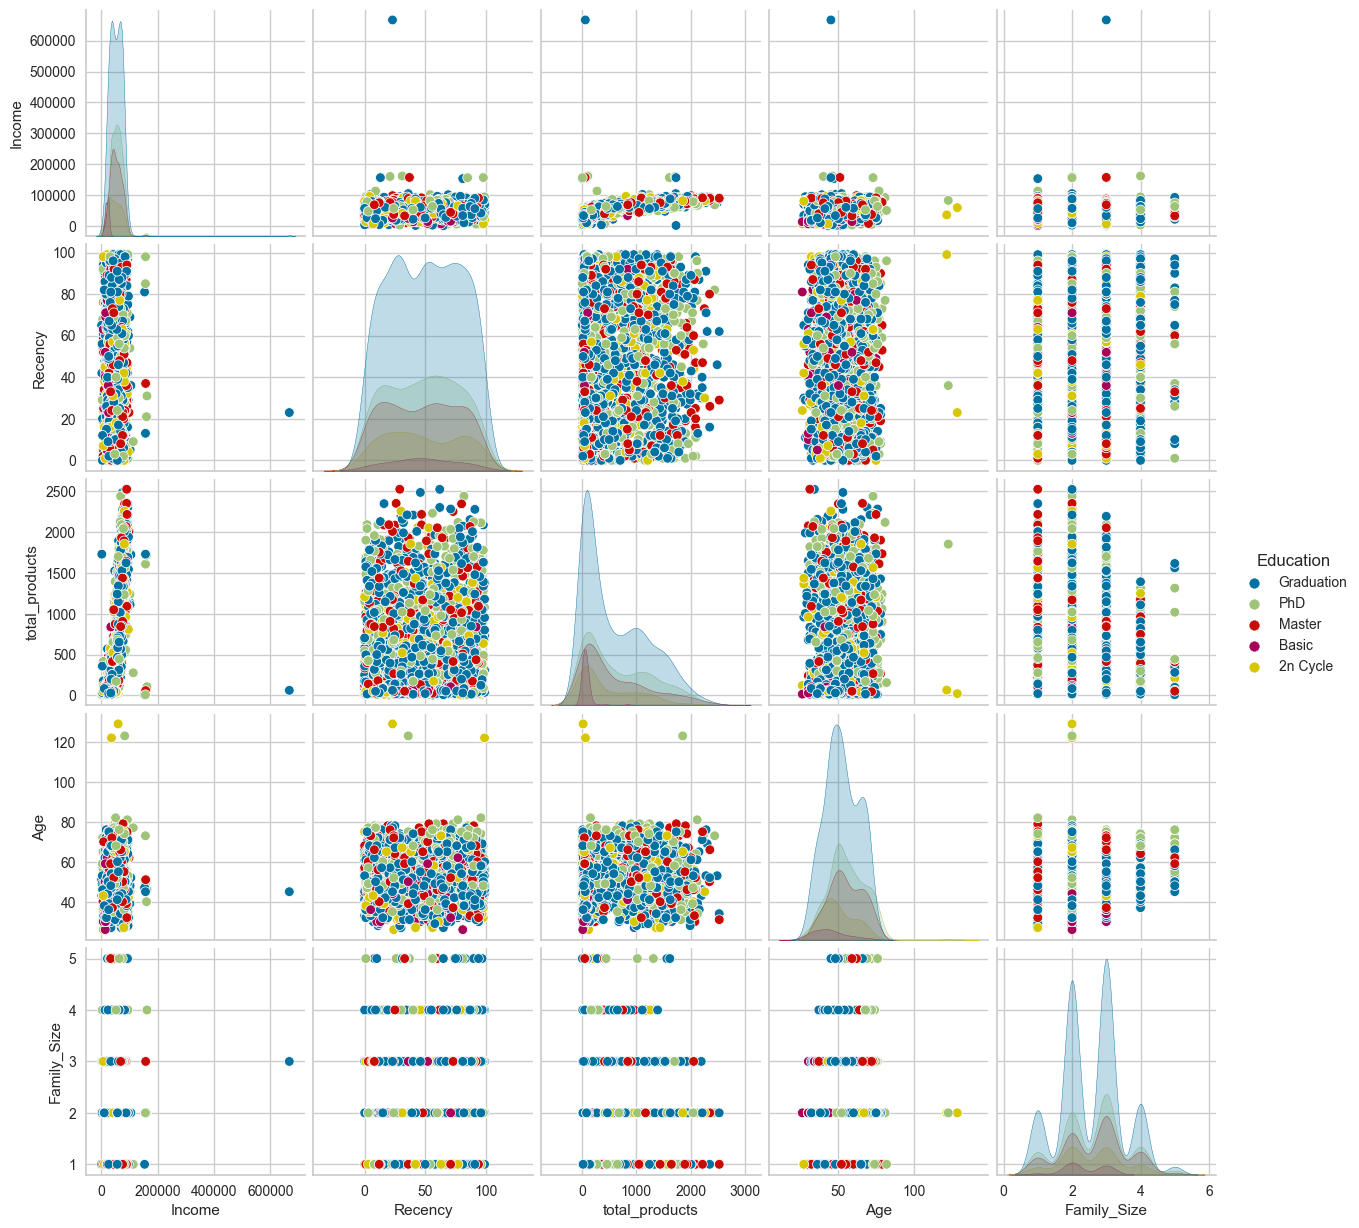

In [35]:
sns.pairplot(data, vars=['Income', 'Recency', 'total_products', 'Age','Family_Size'], hue='Education')

In [36]:
#Drop outliers in Age is greater than 90  and Income is greater than 600,000
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_From_days,Age,Num_Children,Family_Size,total_products
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2.212000e+03,2212.000000,2212.000000,2212.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,0.072785,0.064195,0.013562,0.009042,0.150542,4.378590e+14,53.086347,0.947559,2.593128,607.268083
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,0.259842,0.245156,0.115691,0.094678,0.357683,4.853571e+15,11.701599,0.749466,0.906236,602.513364
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,0.000000,1.000000,5.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.420000e+02,45.000000,0.000000,2.000000,69.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.155000e+02,52.000000,1.000000,3.000000,397.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.900000e+02,63.000000,1.000000,3.000000,1048.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,7.266240e+16,82.000000,3.000000,5.000000,2525.000000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Marital_Status       2212 non-null   object 
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   Wines                2212 non-null   int64  
 7   Fruits               2212 non-null   int64  
 8   Meat                 2212 non-null   int64  
 9   Fish                 2212 non-null   int64  
 10  Sweet                2212 non-null   int64  
 11  Gold                 2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

<AxesSubplot: >

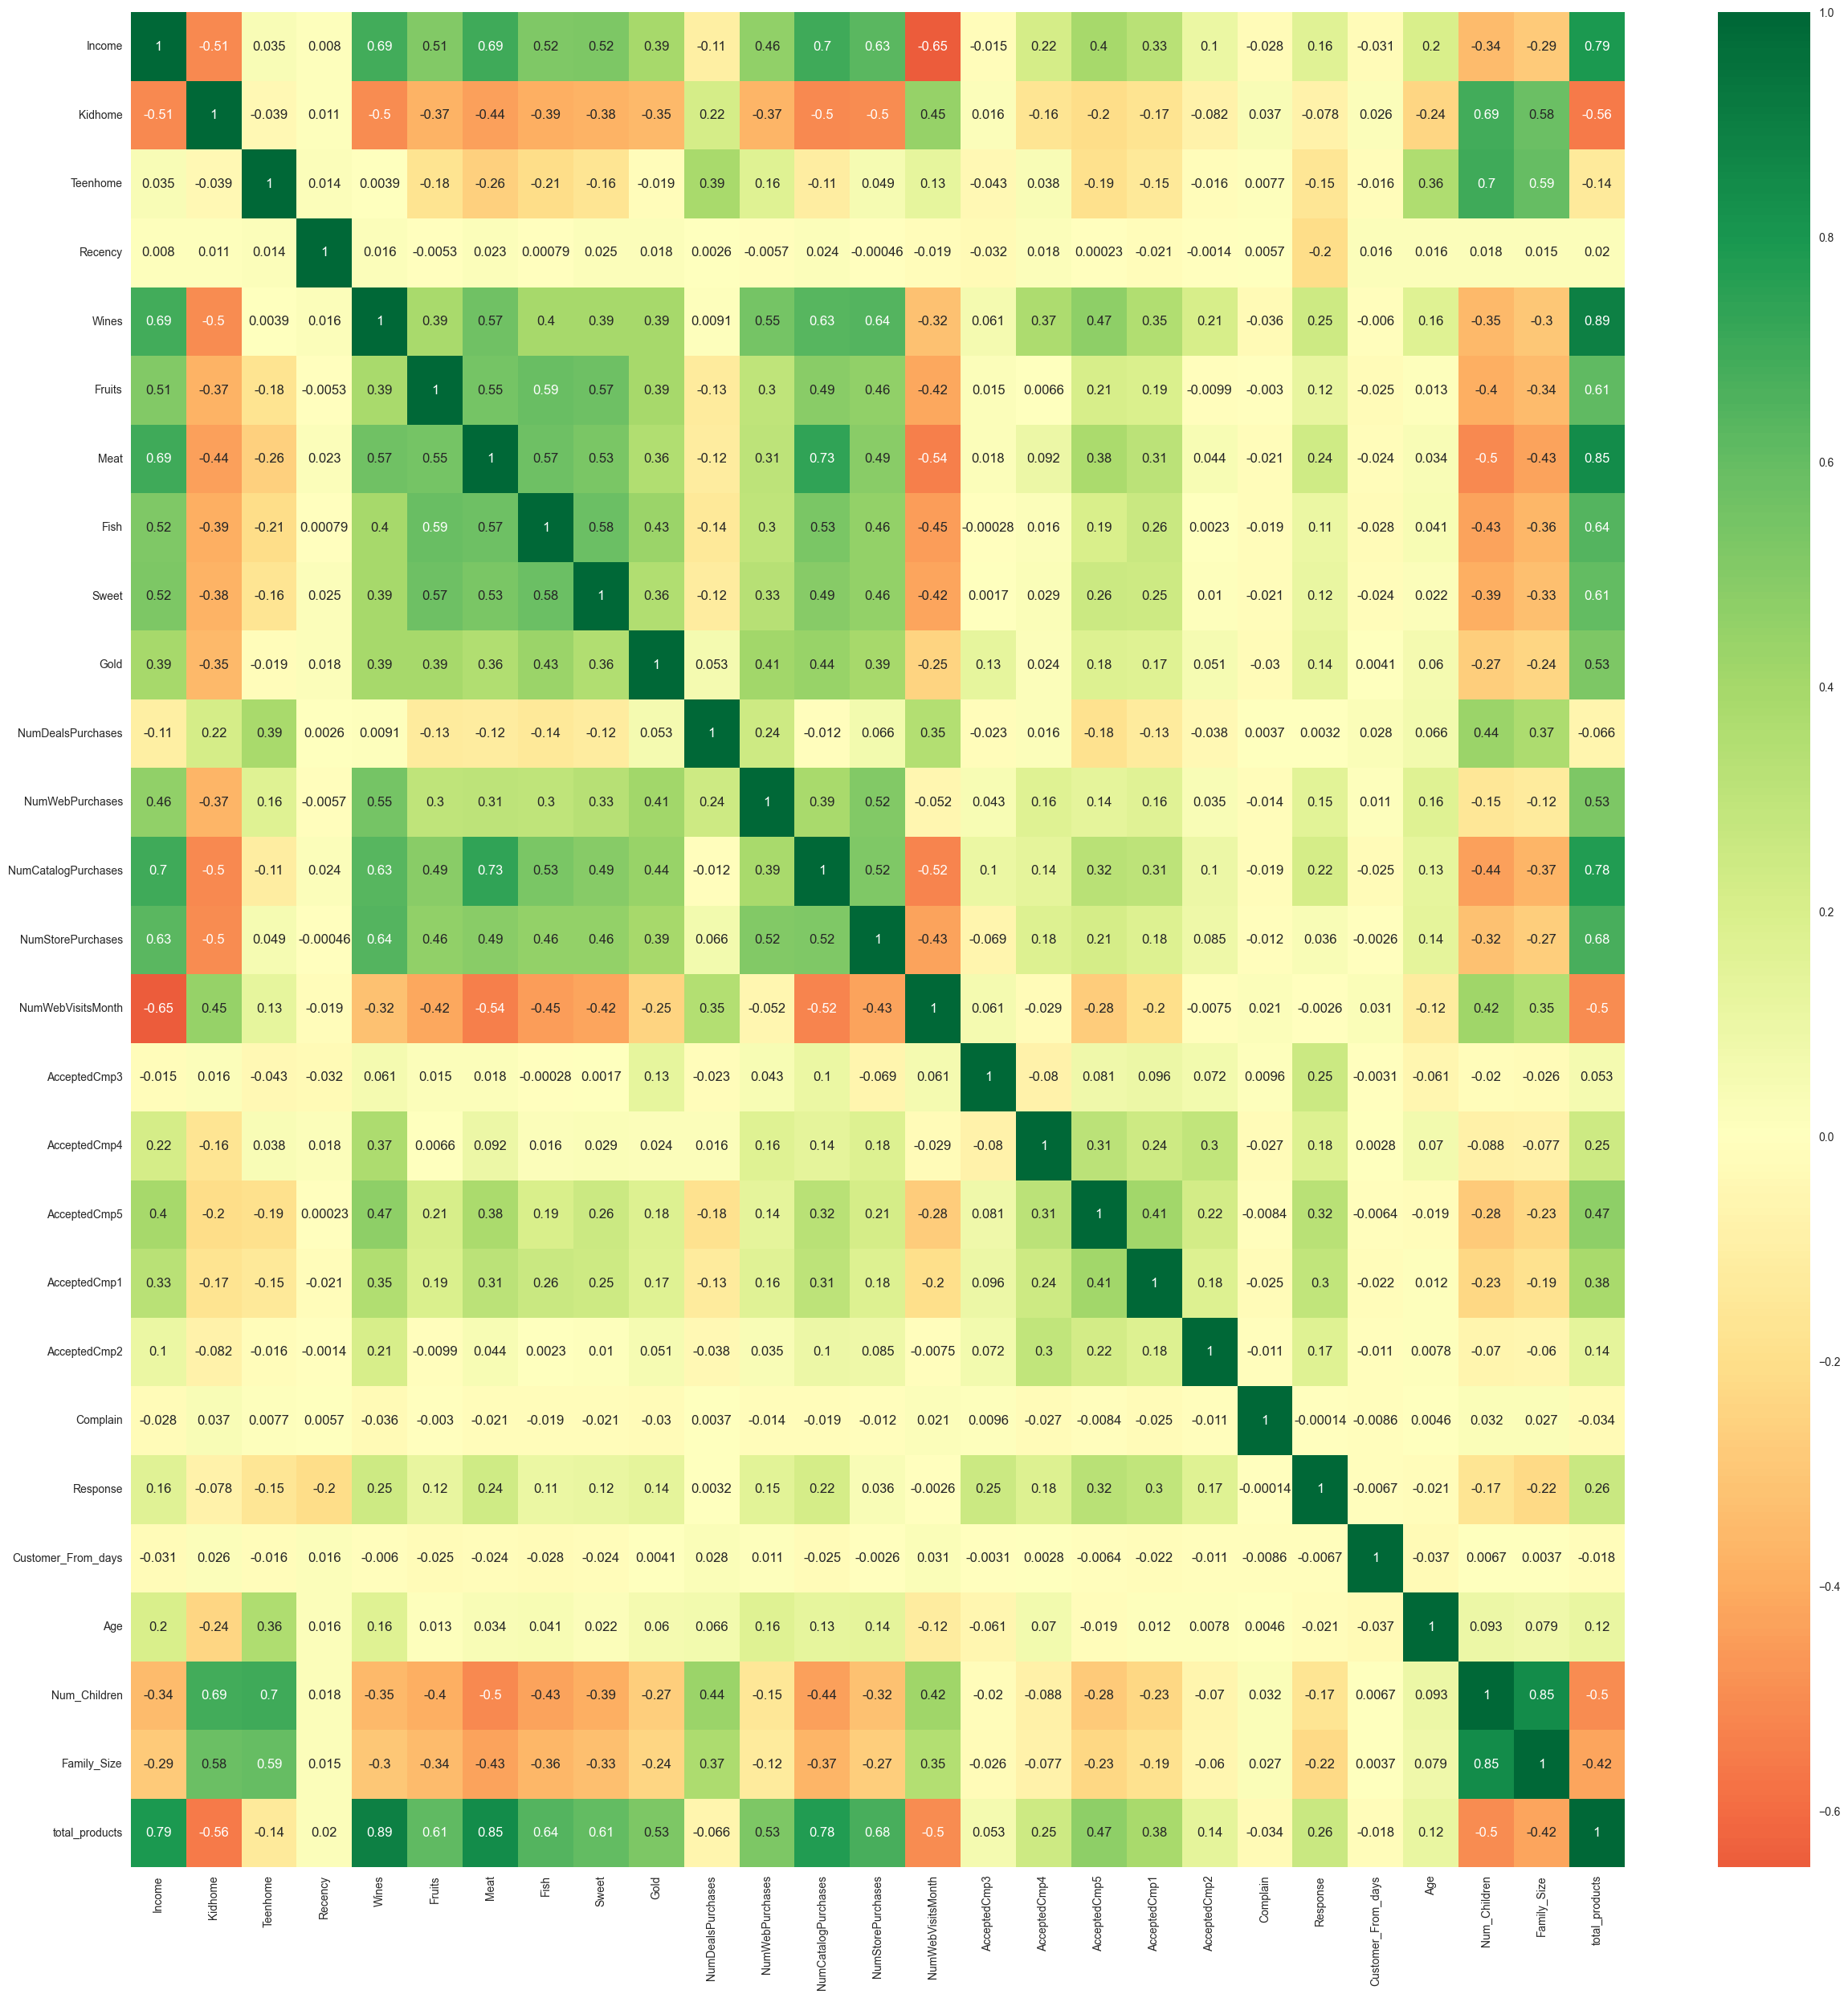

In [38]:
corr_matrix = data.corr()
corr_matrix
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn',center=0)

## Data Preprocessing

In [39]:
#Get list of categorical variables
s = (data.dtypes == 'object')
n=(data.dtypes == 'category')
object_cols = list(s[s].index)
category_col = list(n[n].index)

print("Categorical variables in the dataset:", object_cols,category_col)

Categorical variables in the dataset: ['Education', 'Marital_Status', 'Living_With'] []


In [40]:
#Label Encoding the object dtypes to numerical
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Marital_Status       2212 non-null   int64  
 2   Income               2212 non-null   float64
 3   Kidhome              2212 non-null   int64  
 4   Teenhome             2212 non-null   int64  
 5   Recency              2212 non-null   int64  
 6   Wines                2212 non-null   int64  
 7   Fruits               2212 non-null   int64  
 8   Meat                 2212 non-null   int64  
 9   Fish                 2212 non-null   int64  
 10  Sweet                2212 non-null   int64  
 11  Gold                 2212 non-null   int64  
 12  NumDealsPurchases    2212 non-null   int64  
 13  NumWebPurchases      2212 non-null   int64  
 14  NumCatalogPurchases  2212 non-null   int64  
 15  NumStorePurchases    2212 non-null   i

### Scaling features 

In [42]:
#creating a copy of data
ds=data.copy()
#Scaling using Standard Scaler
scaler = StandardScaler()
scaler.fit(ds)
data_scaled = pd.DataFrame(scaler.transform(ds),columns = ds.columns)

In [43]:
data_scaled.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_From_days,Age,Living_With,Num_Children,Family_Size,total_products
0,-0.352543,0.253678,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,...,-0.261914,-0.117256,-0.09552,2.375425,-0.090234,1.018352,-1.349603,-1.264598,-1.758359,1.676245
1,-0.352543,0.253678,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,...,-0.261914,-0.117256,-0.09552,-0.420977,-0.090234,1.274785,-1.349603,1.404572,0.449070,-0.963297
2,-0.352543,1.195180,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,...,-0.261914,-0.117256,-0.09552,-0.420977,-0.090234,0.334530,0.740959,-1.264598,-0.654644,0.280110
3,-0.352543,1.195180,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,...,-0.261914,-0.117256,-0.09552,-0.420977,-0.090234,-1.289547,0.740959,0.069987,0.449070,-0.920135
4,1.429916,-0.687824,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,...,-0.261914,-0.117256,-0.09552,-0.420977,-0.090234,-1.033114,0.740959,0.069987,0.449070,-0.307562


## Dimensionality Reduction 

In [44]:
#PCA with components = 3
pca = PCA(n_components= 3)
data_scaled_pca =pca.fit_transform(data_scaled)
data_scaled_pca = pd.DataFrame(data_scaled_pca, columns=["col1","col2","col3"])
data_scaled_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-6.424437e-18,2.881244,-5.783808,-2.506378,-0.809376,2.306039,8.393801
col2,2212.0,-5.139550e-17,1.645324,-3.816612,-1.324156,-0.090222,1.165407,6.300810
col3,2212.0,3.131913e-17,1.391165,-3.363328,-0.703760,-0.136889,0.331743,8.763449


In [45]:
print(pca.explained_variance_ratio_)

[0.27659375 0.09019562 0.06448221]


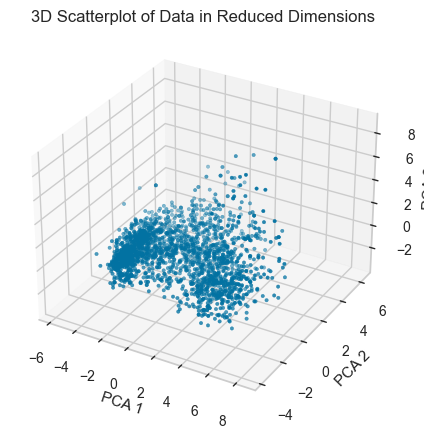

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select the first 3 columns of the transformed data
X_pca = data_scaled_pca[['col1', 'col2', 'col3']]

# Create a 3D scatterplot with custom point sizes
fig = plt.figure(figsize= (10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca['col1'], X_pca['col2'], X_pca['col3'], sizes=[6] * len(X_pca))

# Add labels and title
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D Scatterplot of Data in Reduced Dimensions')

plt.show()


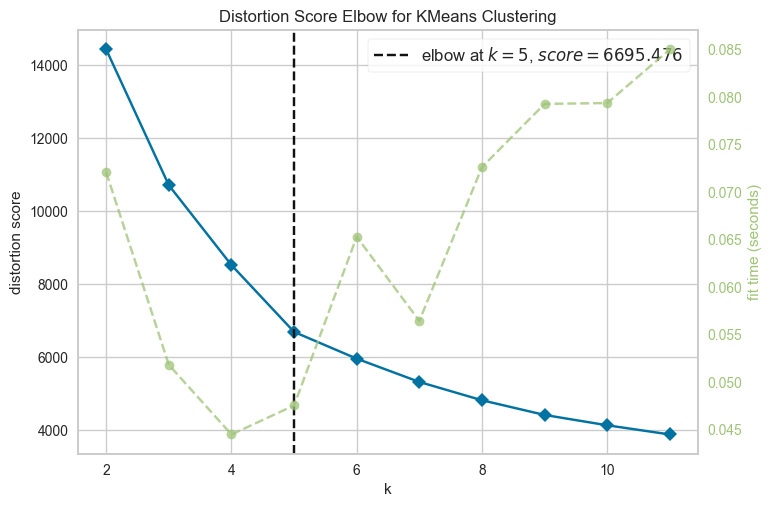

In [47]:
# Create the KMeans model and visualize the elbow
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(data_scaled_pca)
visualizer.poof()
plt.show()



In [48]:
#Initiating the K-Means model 
KM = KMeans(n_clusters=5)
# fit model and predict clusters
yhat_KM = KM.fit_predict(data_scaled_pca)
data_scaled_pca["Clusters"] = yhat_KM
#Adding the Clusters feature to the orignal dataframe.
data_scaled_pca["Clusters"]= yhat_KM
#adding the clusters feature to the orignal dataframe
data["Clusters"] =yhat_KM

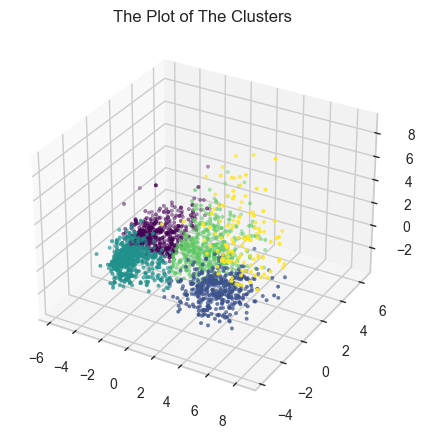

In [49]:
#Create a 3D scatterplot with custom point sizes
fig = plt.figure(figsize= (10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca['col1'], X_pca['col2'], X_pca['col3'], s=40,c=data_scaled_pca["Clusters"],cmap='viridis',sizes=[6] * len(X_pca))
ax.set_title("The Plot of The Clusters")
plt.show()

## Evaluating Models  

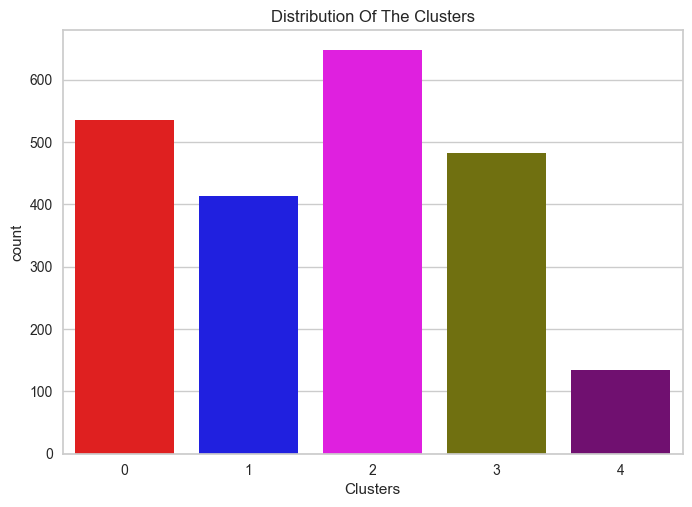

In [50]:
colors = ['#FF0000','#0000FF','#FF00FF','#808000','#800080']
pl = sns.countplot(x=data["Clusters"], palette=colors)
pl.set_title("Distribution Of The Clusters")
plt.show()

### Cluster's based on income and total purchased

In [51]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Customer_From_days', 'Age', 'Living_With',
       'Num_Children', 'Family_Size', 'total_products', 'Clusters'],
      dtype='object')

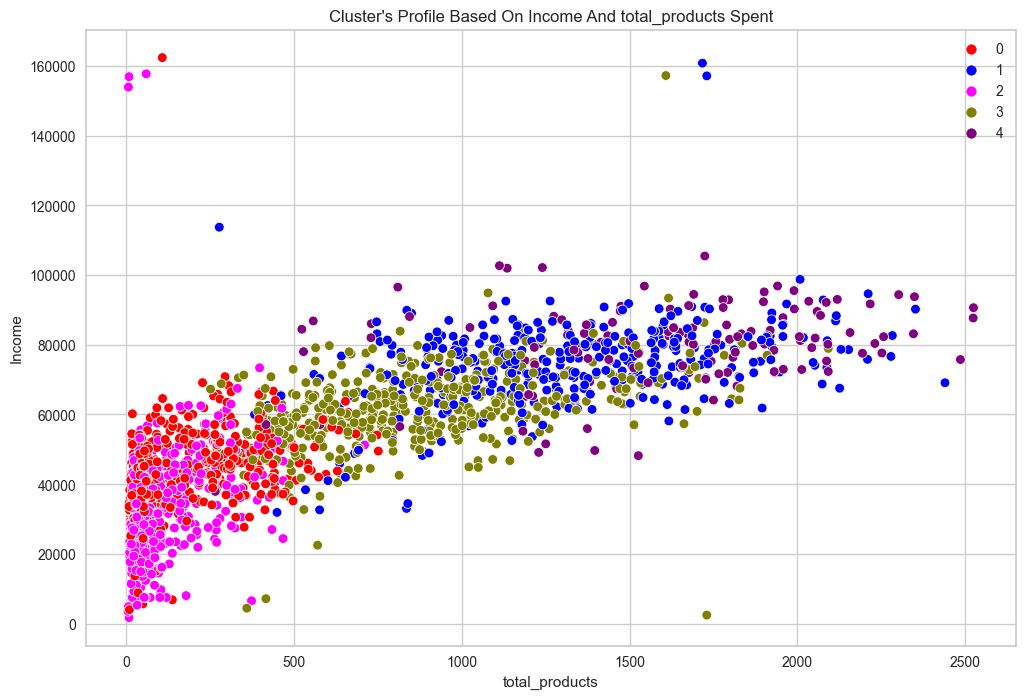

In [52]:
plt.figure(figsize=(12,8))
pl = sns.scatterplot(data = data,x=data["total_products"], y=data["Income"],hue=data["Clusters"], palette= colors)
pl.set_title("Cluster's Profile Based On Income And total_products Spent")
plt.legend()
plt.show()

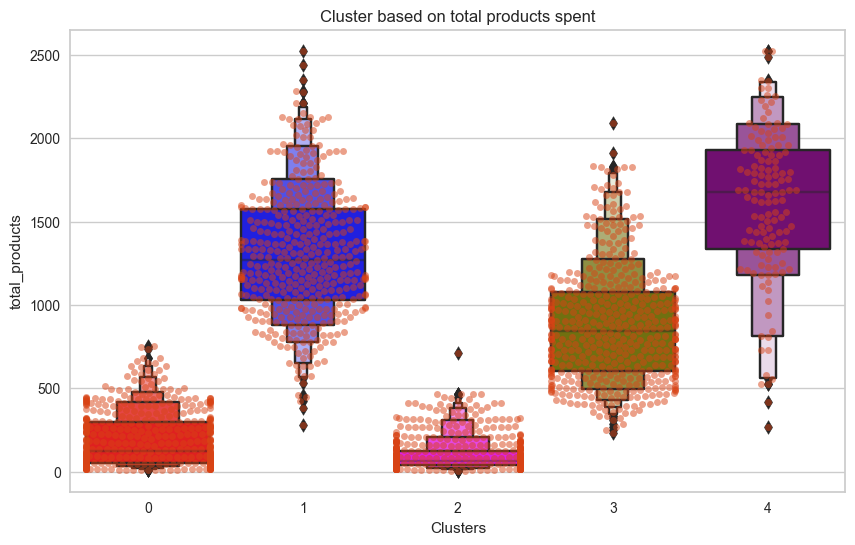

In [53]:
plt.figure(figsize=(10,6))
pl=sns.swarmplot(x=data["Clusters"], y=data["total_products"], color= '#d84315', alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["total_products"], palette=colors)
pl.set_title("Cluster based on total products spent")
plt.show()

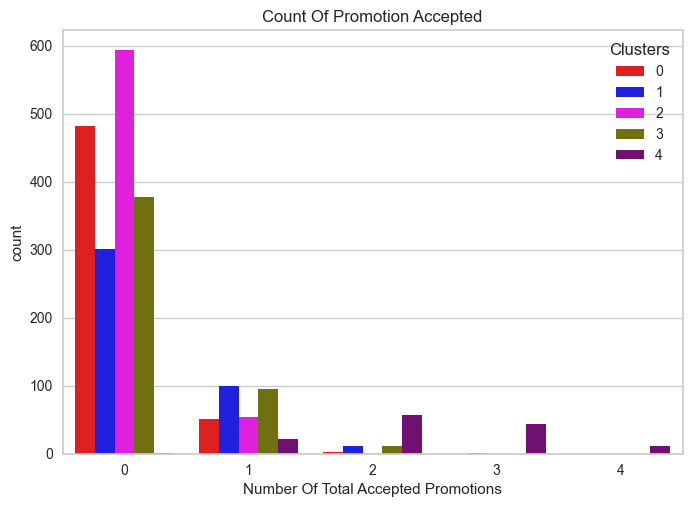

In [54]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= colors)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

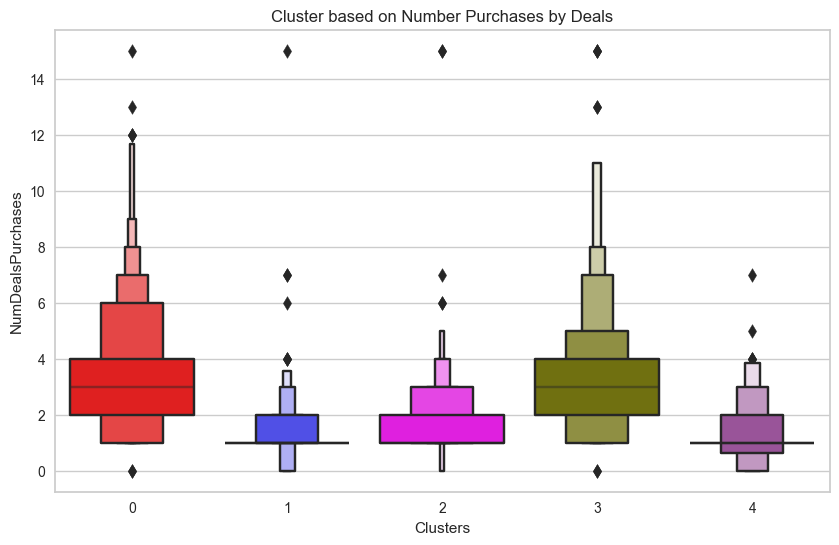

In [55]:
plt.figure(figsize=(10,6))
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= colors)
pl.set_title("Cluster based on Number Purchases by Deals")
plt.show()

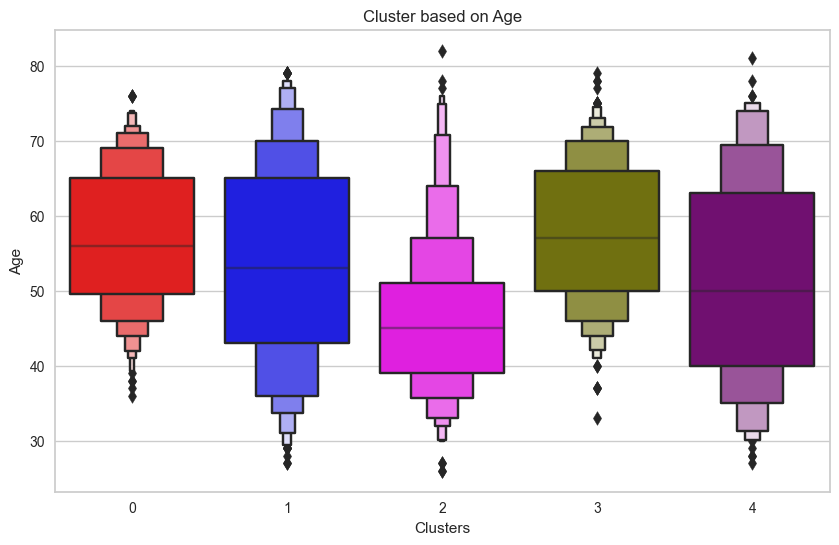

In [56]:
plt.figure(figsize=(10,6))
pl=sns.boxenplot(y=data["Age"],x=data["Clusters"], palette= colors)
pl.set_title("Cluster based on Age")
plt.show()

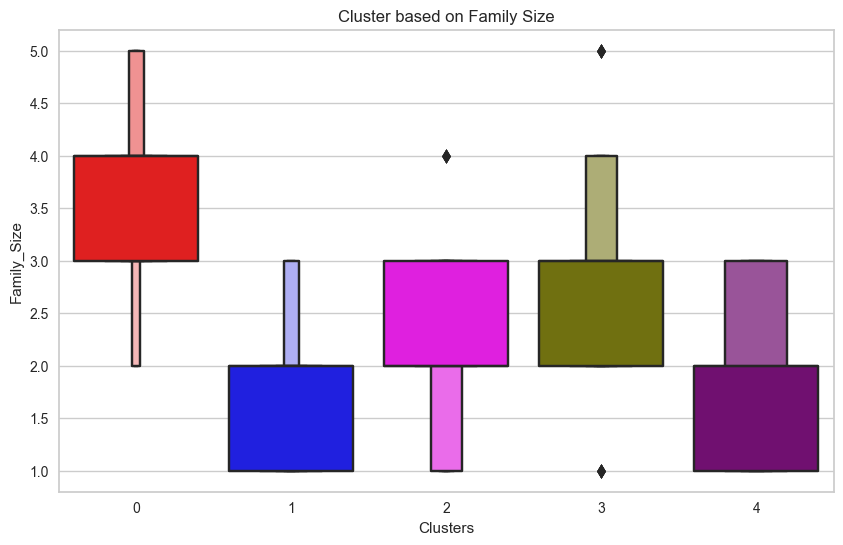

In [57]:
plt.figure(figsize=(10,6))
pl=sns.boxenplot(y=data["Family_Size"],x=data["Clusters"], palette= colors)
pl.set_title("Cluster based on Family Size")
plt.show()

## Profiling 

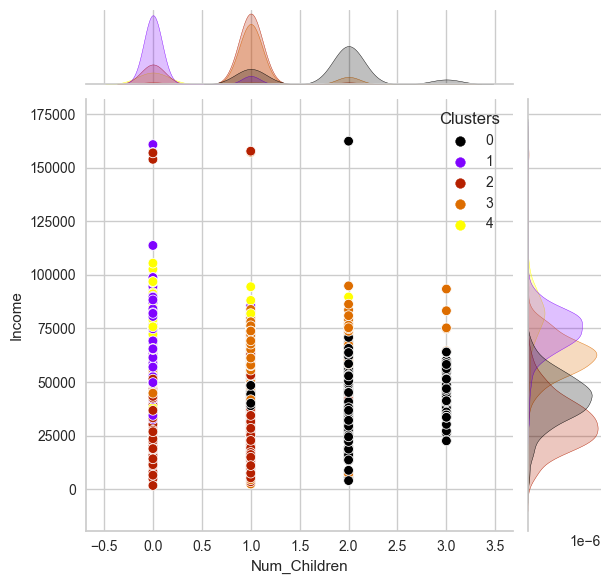

<Figure size 800x550 with 0 Axes>

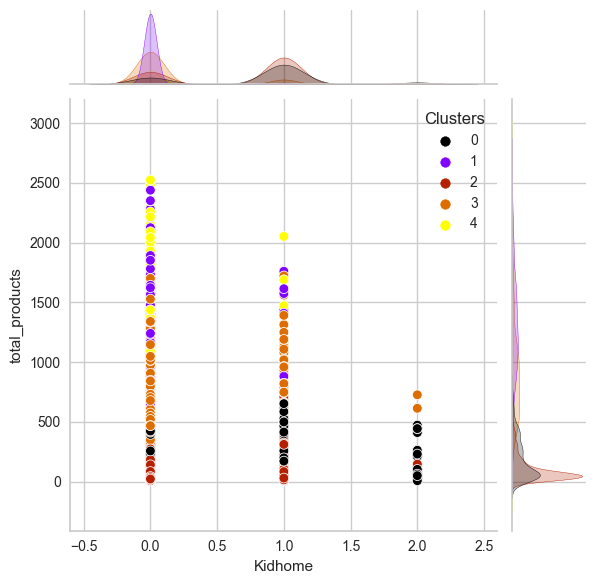

<Figure size 800x550 with 0 Axes>

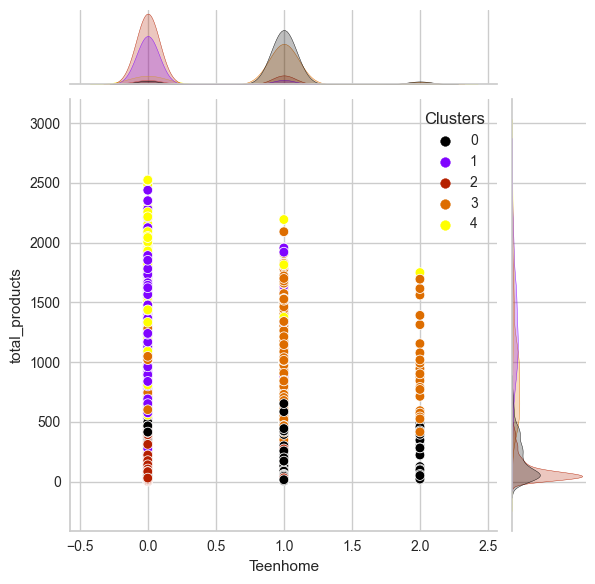

<Figure size 800x550 with 0 Axes>

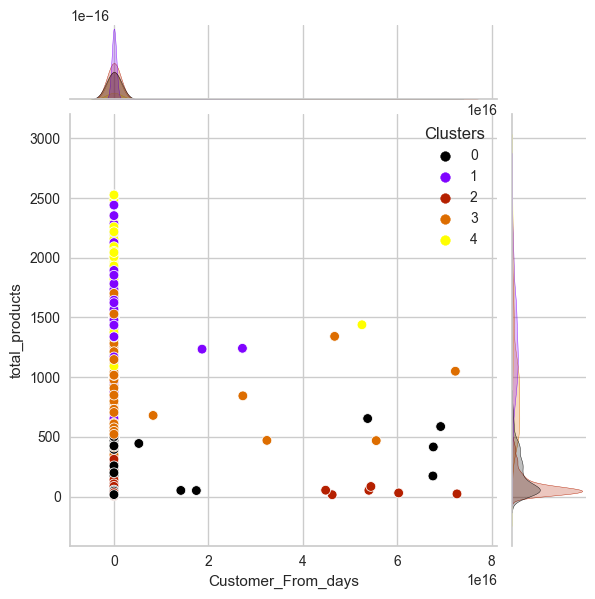

<Figure size 800x550 with 0 Axes>

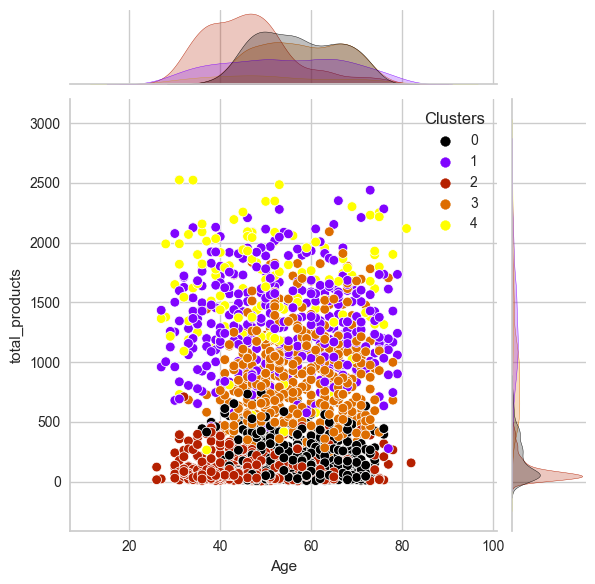

<Figure size 800x550 with 0 Axes>

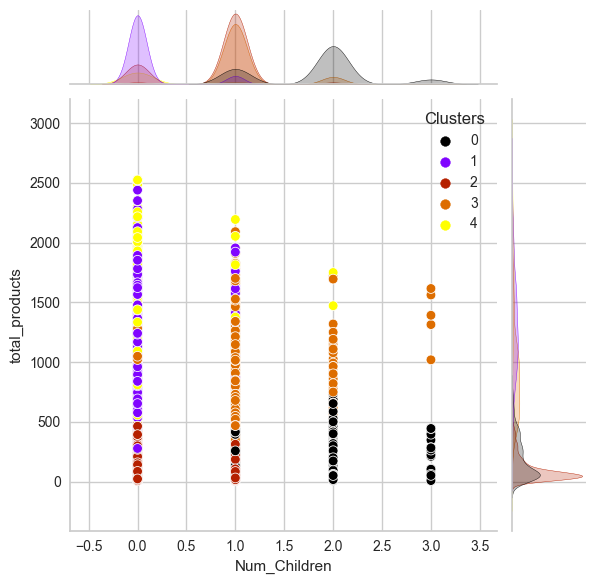

<Figure size 800x550 with 0 Axes>

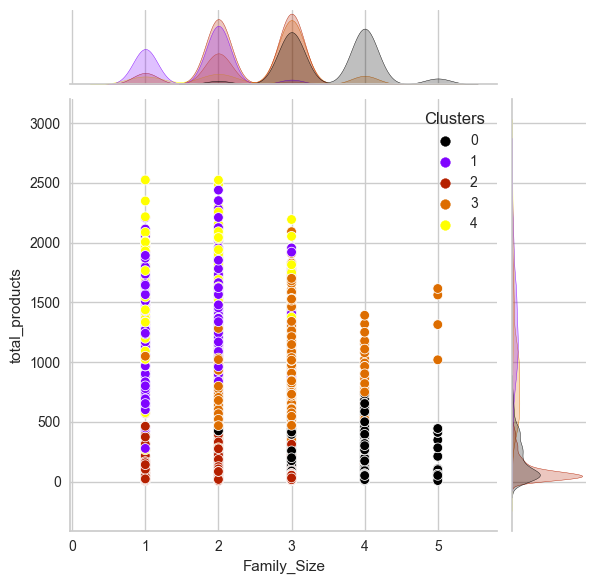

<Figure size 800x550 with 0 Axes>

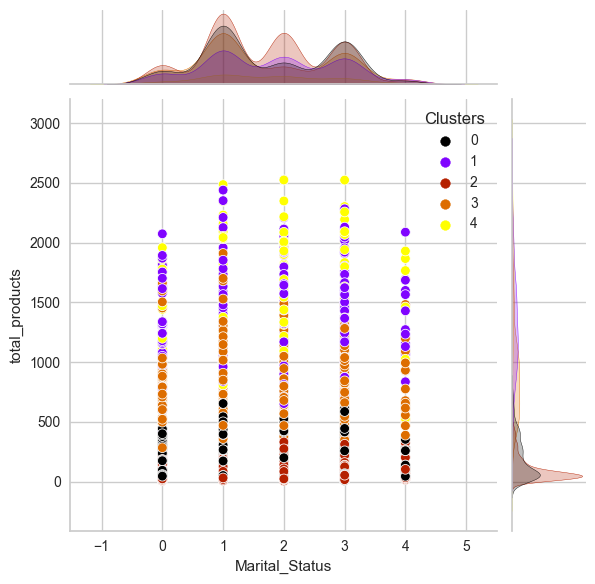

<Figure size 800x550 with 0 Axes>

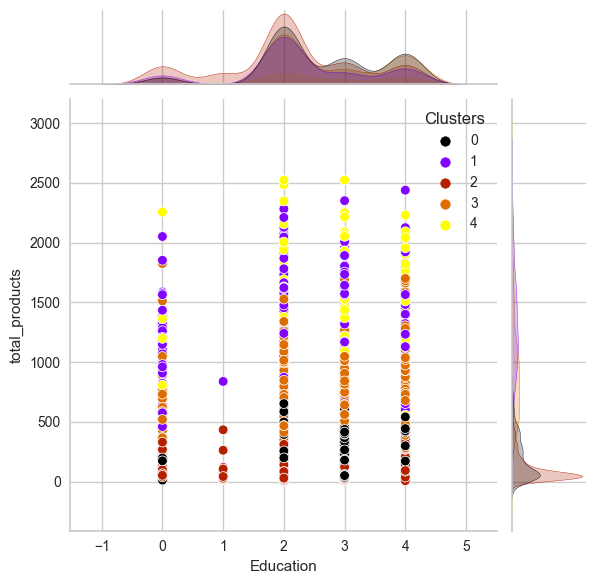

In [63]:
Personal = [ "Kidhome","Teenhome","Customer_From_days", "Age", "Num_Children", "Family_Size",'Marital_Status' ,"Education"]
sns.jointplot(x=data['Num_Children'], y=data["Income"], hue =data["Clusters"],  palette='gnuplot')
for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["total_products"], hue =data["Clusters"], palette='gnuplot')
    plt.show()

In [65]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,...,Complain,Response,Customer_From_days,Age,Living_With,Num_Children,Family_Size,total_products,Clusters,Total_Promos
0,2,2,58138.0,0,0,58,635,88,546,172,...,0,1,971,65,0,0,1,1617,1,0
1,2,2,46344.0,1,1,38,11,1,6,2,...,0,0,125,68,0,2,3,27,0,0
2,2,3,71613.0,0,0,26,426,49,127,111,...,0,0,472,57,1,0,2,776,1,0
3,2,3,26646.0,1,0,26,11,4,20,10,...,0,0,65,38,1,1,3,53,2,0
4,4,1,58293.0,1,0,94,173,43,118,46,...,0,0,321,41,1,1,3,422,3,0


In [66]:
data['Marital_Status'].value_counts()


1    857
3    571
2    477
0    231
4     76
Name: Marital_Status, dtype: int64


1 857 3 571 2 477 0 231 4 76

Married 857 Together 573 Single 478 Divorced 232 Widow 76

0: Divorced
1: Married
2: Single
3: Together
4: Widow
